<a href="https://colab.research.google.com/github/ai7dnn/2021-2-DNN/blob/main/code/21_9_boston_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.6.0'

# 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

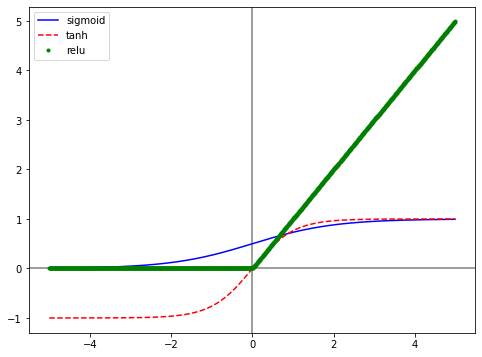

In [ ]:
# 활성화 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.figure(figsize=(8, 6)) 

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [ ]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(train_X.shape, test_X.shape)
print(train_X[0])
print(train_Y[0])

(404, 13) (102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [ ]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [ ]:

# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
#model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_21 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_22 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 1s 17ms/step - loss: 3.4685 - val_loss: 0.8027
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.4705 - val_loss: 0.3747
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2967 - val_loss: 0.3837
Epoch 4/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2563 - val_loss: 0.3381
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2214 - val_loss: 0.3407
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1973 - val_loss: 0.3045
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1883 - val_loss: 0.3874
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2231 - val_loss: 0.4336
Epoch 9/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2299 - val_loss: 0.2843
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1701 - val_loss: 0.3262
Epoch 11/25
10/10 

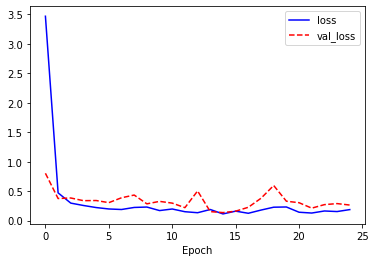

In [ ]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.2184


0.21842296421527863

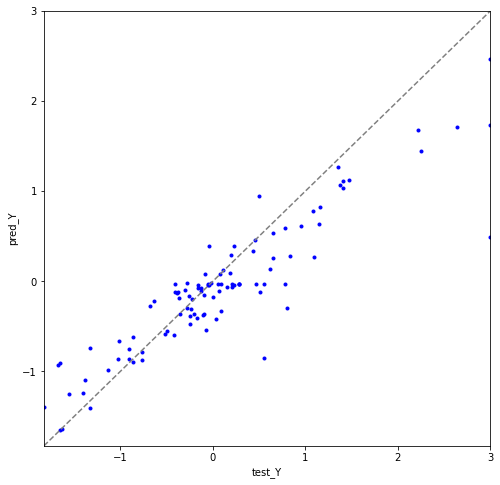

In [ ]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
# x, y축 범위 설정
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".5")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
10/10 [==============================] - 1s 16ms/step - loss: 1.6120 - val_loss: 0.6281
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3916 - val_loss: 0.4531
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2726 - val_loss: 0.2999
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2343 - val_loss: 0.3230
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2165 - val_loss: 0.1677
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1550 - val_loss: 0.1774
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1265 - val_loss: 0.1812
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1221 - val_loss: 0.2845


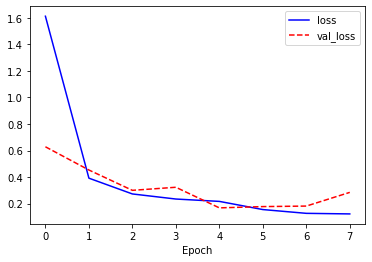

In [ ]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.3985


0.3984910547733307

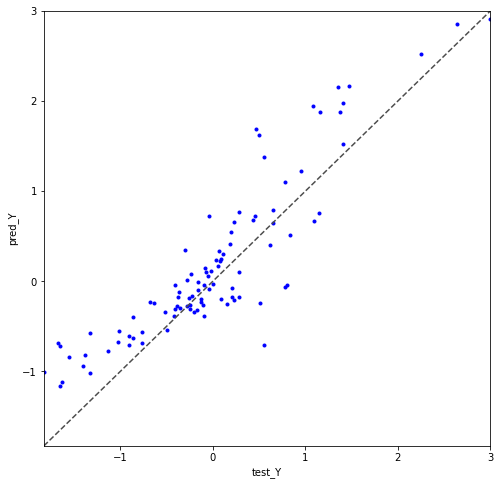

In [ ]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
# 모델 재정의 및 학습, dropout 사용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

# history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.25,
#                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=8, monitor='val_loss')])
history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
10/10 [==============================] - 1s 15ms/step - loss: 2.6006 - val_loss: 1.2664
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7211 - val_loss: 0.8832
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.4728 - val_loss: 0.6558
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.4330 - val_loss: 0.4472
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.3676 - val_loss: 0.3198
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3309 - val_loss: 0.2062
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.3850 - val_loss: 0.3871
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2965 - val_loss: 0.2696
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2668 - val_loss: 0.3145
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2134 - val_loss: 0.2138
Epoch 11/50
10/10 

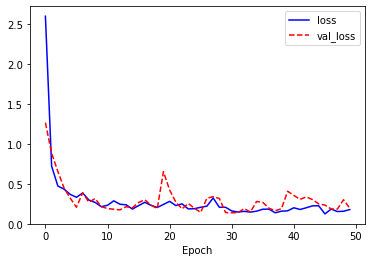

In [ ]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.3022


0.3021870255470276

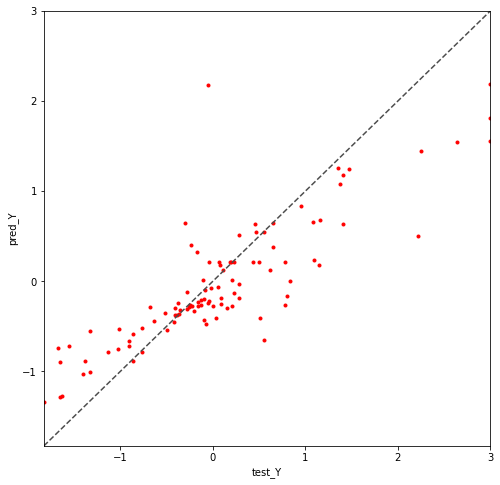

In [ ]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'r.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()